> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [Dataset-name]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

Dans ce projet j'ai choisi de travailler sur la base de données "No-show appointements".La base de donnée est composée de 14 colonnes:
-PatientId: Identifiant du patient
-AppointmentID: Identifiant du rendez-vous
-Gender: le sexe du patient
-ScheduledDay: la date de prise du rendez-vous
-AppointmentDay: la date du rendez-vous
-Age: l'age du patient
-Neighbourhood: la ville du rendez-vous
-Scholarship: Est ce que le patient dispose d'une aide financière par le gouvernement brésilien?
-Hipertension: vrai ou faux
-Diabetes: vrai ou faux
-Alcoholism: vrai ou faux
-Handcap: 5 catégories des handicaps
-SMS_received: le patient a réçu un ou plusieurs messages
-No-show: "Non" si le patient s'est présenté à son rendez-vous et oui s'il s'absentait.

    

### Question(s) for Analysis
Dans cette étude on va essayer de trouver les facteurs explicatifs des abscences des patients lors de leurs rendez-vous medicaux à partir des variables explicatives présentes dans la base de données.
On va chercher analyser le pouvoir explicative de deux types des variables:

1-Les variables relatives au rendez-vous: l'écart entre la date de prise du rendez vous (scheduled day) et la date du rendez-vous (appointement day), la reception du message, le jour de la semaine de rendez vous


2-Les variables relatives au patient: le sexe,l'age, la ville, aide financière,hypertension,diabete,alcoholism,handicap,


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  



In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


In [69]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv",sep=',')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.shape

(110527, 14)

La base de données est composée de 110527 lignes et 14 colonnes.

In [5]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

Cette commande nous permet de savoir le nombre des valeurs manquantes par colonne. On pourra choisir par la suite soit de dropper les colonnes avec des valeurs manquantes ou de les remplir moyennant la commande fillna.

La commande montre qu'aucune colonne n'a des valeurs manquantes.


In [6]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


df.describe renseigne également sur le nombre des observations non nulles par colonne.
En plus de ceci ça renseigne sur la moyennes des variables, l'écart-type, les minimums, les maximums et différents niveaux de quantile.ça peut etre itéressant pour voir la dispersion des observations (écart-type élevé) en plus de faciliter la détection des valeurs abbérantes (surtout à l'aide des maximum et minimums si on connait un intervale acceptable des données)

Pour notre base de données:
-Age: l'age maximal est de 115 ce qui peut etre accepté mais l'age minimum est de -1 (valeur négative) ce qui est abbérant car l'age est positif. Pour cette valeur si elle est nombreuse on va rectifier par la moyenne sinon on va juste dropper les lignes concernées.
-Pour les variables avec des modalités ( 2 ou 5 ) les outputs sont logiques.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


df.info() résume entre autres le role de df.dtypes et ça renseigne sur les types des différents variables en plus du nombre des valeurs non nulles par colonnes.
ça permet de detecter s'il y'a un problème de type qui va bloquer l'analyse par la suite.
Pour notre base: 
-AppointementID doit etre un float
-ScheduledDay doit etre une date
-AppointementDay doit etre une date et mettre au meme format que ScheduledDay pour minimiser les risques d'incompatibilité par la suite
-Age peut rester un entier
-Neighbourhood est un objet. en investigant d'avantage ça montre que c'est un string ce qui est bon.
-Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received : sont des entiers.on peut les garder.




In [77]:
#Investiguer Neighbourhood encore plus
type(df['ScheduledDay'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [16]:
df.duplicated().sum()

0

On calcule le nombre des duplicates et on décide par la suite si on va les garder ou éliminer certains.
Pour notre base il n'y a pas de duplicates

In [30]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

Voir le nombre des valeurs uniques par variables. Pour les variables à modalités définies ça doit etre inférieur ou égale ou nombre des modalités disponibles sinon c'est une abbération.
Pour notre base on remarque que les ScheduledDay sont largement supérieures aux AppointementDay ce qui confirme que ScheduledDay doit etre mis sous le format de AppointementDay pour que deux jours identiques dans les deux variables seront identifiés comme identiques.

In [38]:
df.Age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

In [8]:
# View the index number and label for each column
for i, v in enumerate(df.columns):
    print(i, v)

0 PatientId
1 AppointmentID
2 Gender
3 ScheduledDay
4 AppointmentDay
5 Age
6 Neighbourhood
7 Scholarship
8 Hipertension
9 Diabetes
10 Alcoholism
11 Handcap
12 SMS_received
13 No-show


Pour investiguer les libelés des colonnes et les changer pour les rendre plus facile dans les appels des fonctions appliqués sur DataFrame.
-On doit mettre tous les lettres en lowercase car c'est plus facile à manipuler
-Corriger l'orthographe de Neighborhood, Handicap,Hipertension.En outre, on doit éliminer "-" de No-show et "_" de Sms_received car ça devient impossible de l'appeler par df.column


In [2]:
#Drop age négatif si pas beaucoup d’observation
import pandas as pd
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv",sep=',')

###Savoir si on elimine l'age negatif ou on utilise fillna en calculant le nombre d'observation avec un age négatif
dd=df.query('Age < 0')
dd.shape

#Une seule observation donc on peut se permettre de l'éliminer de la base qui est assez large
df.drop(df[df['Age'] < 0].index, inplace = True)

#Vérifier que la modification est prise en compte
df.shape


(110526, 14)

In [3]:
#AppointementID doit etre un float
df.AppointmentID= df.AppointmentID.astype(float)
df.head(1)

#ScheduledDay doit etre une date
df.ScheduledDay = pd.to_datetime(df.ScheduledDay)
df.head(1)

#AppointementDay doit etre une date et mettre au meme format que ScheduledDay
df.AppointmentDay = pd.to_datetime(df.AppointmentDay)
df.head(1)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903.0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No


Aprés chaque modification on exécute la commande df.head(1) pour vérifier que la commande à été bien prise en compte.

In [4]:

#Corriger l'orthographe de Neighborhood, hypertension, Handicap
df.rename(columns={'Neighbourhood': 'Neighborhood','Hipertension': 'hypertension','Handcap': 'Handicap'}, inplace=True)
df.head(1)

#On doit mettre tous les lettres en lowercase et remplacer "-" par "_" car c'est plus facile à manipuler et appeler en df.column
df.rename(columns=lambda x: x.strip().lower().replace(" ", ""), inplace=True)
df.rename(columns=lambda x: x.strip().lower().replace("-", ""), inplace=True)
df.rename(columns=lambda x: x.strip().lower().replace("_", ""), inplace=True)
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,smsreceived,noshow
0,2.987250e+13,5642903.0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

# (1d) and multiple-variable (2d) explorations.



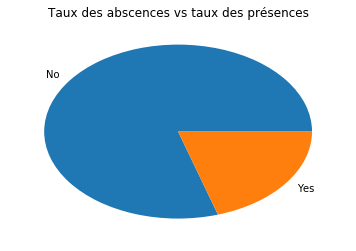

No     0.798066
Yes    0.201934
Name: noshow, dtype: float64


In [5]:
#Taux d'abscence

values=df.noshow.value_counts(normalize=True)
labels=df.noshow.unique().tolist()
plt.pie(values,labels=labels)
plt.title('Taux des abscences vs taux des présences')
plt.show()
print(values)

(array([  1.99440000e+04,   1.47320000e+04,   1.69490000e+04,
         1.59600000e+04,   1.86750000e+04,   1.41370000e+04,
         7.27700000e+03,   2.61000000e+03,   2.37000000e+02,
         5.00000000e+00]), array([   0. ,   11.5,   23. ,   34.5,   46. ,   57.5,   69. ,   80.5,
         92. ,  103.5,  115. ]), <a list of 10 Patch objects>)


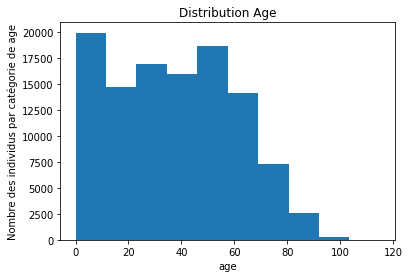

In [6]:
h=plt.hist(df.age,bins=10)
print(h)
plt.title('Distribution Age')
plt.xlabel('age')
plt.ylabel('Nombre des individus par catégorie de age')
plt.show()

[Text(0.5,1,'No show Vs Age')]

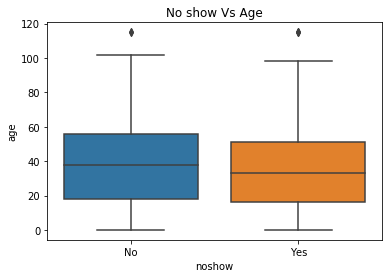

In [9]:
# box plot illustration
sns.boxplot(x='noshow', y='age', data=df).set(title='No show Vs Age')

#Pourcentage des abscences
En dessinant le piechart, on peut déduire que le taux d'abscence dans les rendez-vous est de 20,2%.

#Distribution de l'age 
La tranche d'age la plus présente dans l'echantillon (parmi les 10 tranches définies dans le graphe) est celle entre 0 et 11,5 ans ( enfants).

 
#Lien age et abscence en rendez-vous

D'aprés les boxplots, on remarque que les gens qui s'absentent (Yes) au rendez-vous ont tendance a etre plus jeune que ceux qui se présentent au rendez-vous. 

### Les caracteristiques du rendez-vous explicatifs de l'absence 

In [8]:
df_abscent=df[df.noshow=='Yes']
df_present=df[df.noshow=='No']

#Est ce que le jour de a prise de rendez-vous influe sur la possibilité d'abscence?
nbre_abscence_jour=df_abscent.appointmentday.dt.dayofweek.value_counts()
nbre_presence_jour=df_present.appointmentday.dt.dayofweek.value_counts()
nbre_rdv_jour=df.appointmentday.dt.dayofweek.value_counts()
Effet_jour_rdv0=pd.concat([nbre_rdv_jour,nbre_abscence_jour],axis=1)
Effet_jour_rdv=pd.concat([Effet_jour_rdv0,nbre_presence_jour],axis=1)
Effet_jour_rdv.columns=['rdv','abscence','presence']
taux_abscence_jour=Effet_jour_rdv.abscence/Effet_jour_rdv.rdv
print(taux_abscence_jour[taux_abscence_jour==max(taux_abscence_jour)])
taux_presence_jour=Effet_jour_rdv.presence/Effet_jour_rdv.rdv
print(taux_presence_jour[taux_presence_jour==max(taux_presence_jour)])




5    0.230769
dtype: float64
3    0.806459
dtype: float64


0    15.832385
dtype: float64
0    8.754759
dtype: float64
ILHA DO BOI    0.085714
dtype: float64


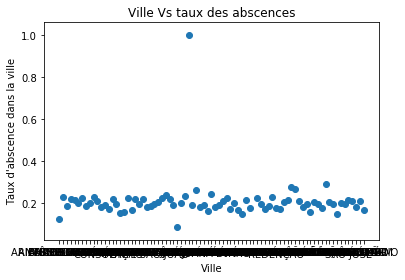

In [12]:
#Est-ce que l’ecart entre appointement date et scheduled date explique le no show ?
ecart_abscent=df_abscent.appointmentday.dt.date-df_abscent.scheduledday.dt.date #dt.date pour ne pas avoir -1 à cause de l'heure de meme jour
ecart_abscent=ecart_abscent.astype('str').str.extract('(\d+)').astype(int)
ecart_moyen_en_jour_pour_les_abscents=ecart_abscent.mean()
print(ecart_moyen_en_jour_pour_les_abscents)

ecart_present=df_present.appointmentday.dt.date-df_present.scheduledday.dt.date
ecart_present=ecart_present.astype('str').str.extract('(\d+)').astype(int)
ecart_moyen_en_jour_pour_les_presents=ecart_present.mean()
print(ecart_moyen_en_jour_pour_les_presents)


#Est ce que la ville du rdv explique l'abscence des patients ?
neighborhood_occurence=df.neighborhood.value_counts()
neighborhood_occurence
neighborhood_occurence_abscence=df_abscent.neighborhood.value_counts()
neighborhood_occurence_abscence
effet_neighborhood=pd.concat([neighborhood_occurence,neighborhood_occurence_abscence],axis=1,sort=True)
effet_neighborhood.columns=['rdv','abscence']
taux_abscence_neighborhood=effet_neighborhood.abscence/effet_neighborhood.rdv
print(taux_abscence_neighborhood[taux_abscence_neighborhood==min(taux_abscence_neighborhood)])
plt.scatter(x=taux_abscence_neighborhood.index,y=taux_abscence_neighborhood)
plt.xlabel("Ville")
plt.ylabel("Taux d'abscence dans la ville")
plt.title("Ville Vs taux des abscences")
plt.show()

#Est ce que le jour de a prise de rendez-vous influe sur la possibilité d'abscence?

L'output de la fonction dayofweek of week de pandas renvoie:
0 si lundi
1 si mardi
2 si mercredi
3 si jeudi
4 si vendredi
5 si samedi
6 si dimanche
On constate que le taux d'abscence maximum est constaté le samedi ( les gens prefere passer leur samedi dans un autre lieu que le cabinet du docteur) alors que le taux de presence maximale est constaté le jeudi ( 80% des patients qui reserve le jeudi se présente au rendez-vous).


#Est-ce que l’ecart entre appointement date et scheduled date explique le no show ?

On remarque que la moyenne des jours d'attente (entre la date de prise du rdv est celle du rdv ) est de 15 jours pour les individus qui s'absentent alors que elle est de 8 jours pour les patients qui se présentent à leurs rdv.
on peut donc dire que le délai d'attente peut etre un facteur explicatif de l'abscence des patients.




#Est ce que la ville du rendez-vous est un facteur explicatif de l'abscence?
Les taux d'abscence par ville sont proches d'aprés le scatterplot donc ce n'est pas forcément un facteur explicatif de l'abscence des patients.Cependant on peut tirer des constats intéressants tel que le fait que le taux d'abscence dans ILHAS OCEÂNICAS DE TRINDADE est de 100% et le taux d'abscence dans ILHA DO BOIS est proche de 0%.


### Les features du patient explicatifs de l'absence

In [13]:

#L’identifiant du patient qui a le plus raté des rendez vous ?
df_nbre_rdv_rate = df_abscent.patientid.value_counts()
print(df_nbre_rdv_rate[df_nbre_rdv_rate==max(df_nbre_rdv_rate)])

#Est ce que le sexe du patient peut etre un facteur explicatif de son absentéisme?
nombre_rdv_sexe=df.gender.value_counts()
print(nombre_rdv_sexe)
nombre_abscence_sexe=df_abscent.gender.value_counts()
effet_sexe=pd.concat([nombre_rdv_sexe,nombre_abscence_sexe],axis=1,sort=True)
effet_sexe.columns=['rdv','abscence']
Pourcentage_abscence_par_sexe=effet_sexe.abscence/effet_sexe.rdv
print(Pourcentage_abscence_par_sexe)



#Est ce que l'age du patient peut etre un facteur explicatif de son absentéisme?
age_moyen_abscent=df_abscent.age.mean()
print(age_moyen_abscent)
age_moyen_present=df_present.age.mean()
print(age_moyen_present)




1.421987e+12    18
Name: patientid, dtype: int64
F    71839
M    38687
Name: gender, dtype: int64
F    0.203149
M    0.199679
dtype: float64
34.3176665621
37.790504155


#Est ce que le sexe du patient peut etre un facteur explicatif de son absentéisme?

On constate que les taux d'absence chez les hommes et les femmes sont trés proches.Ainsi, le sexe du patient n'explique pas son comportement ( abscent ou présent)


#Est ce que l'age du patient peut etre un facteur explicatif de son absentéisme?

On constate que l'age moyen des patients qui ratent leurs rendez vous est de 34,3 ans alors que celui qui se présente au rendez-vous est de 37,8 ans. Les abscents sont plus jeunes que les présents de 3,5 ans en moyenne.


### Research Question 2 

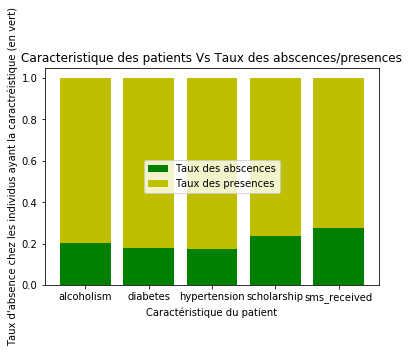

In [11]:
#Y’a une correlation entre une feature du patient (aide financière,hypertension,diabete,alcoolism) et rater les rdv ?
x = ['scholarship','hypertension','diabetes','alcoholism','sms_received']
y1 = [df_abscent.scholarship.sum()/df.scholarship.sum(), df_abscent.hypertension.sum()/df.hypertension.sum(),df_abscent.diabetes.sum()/df.diabetes.sum(),df_abscent.alcoholism.sum()/df.alcoholism.sum(),df_abscent.smsreceived.sum()/df.smsreceived.sum()]
y2 = [df_present.scholarship.sum()/df.scholarship.sum(), df_present.hypertension.sum()/df.hypertension.sum(),df_present.diabetes.sum()/df.diabetes.sum(),df_present.alcoholism.sum()/df.alcoholism.sum(),df_present.smsreceived.sum()/df.smsreceived.sum()]

# plot stacked bar chart 
plt.bar(x, y1, color='g')
plt.bar(x, y2, bottom=y1, color='y')
plt.xlabel("Caractéristique du patient")
plt.ylabel("Taux d'absence chez les individus ayant la caractréistique (en vert)")
plt.title("Caracteristique des patients Vs Taux des abscences/presences")
Taux=['Taux des abscences','Taux des presences']
plt.legend(Taux,loc=10)
plt.show()





#Est ce que les patients alcoliques ont plus de tendance à se présenter au rendez-vous?
Oui, en effet 80% des patients alcoliques se présentent à leurs rendez-vous.


#Est ce que les patients diabetiques ont plus de tendance à se présenter au rendez-vous?
Oui, en effet plus que 80% des patients diabetiques se présentent à leurs rendez-vous.


#Est ce que les patients qui souffrent de l'hypertension ont plus de tendance à se présenter au rendez-vous?
Oui, en effet plus que 80% des patients qui souffrent de l'hypertension se présentent à leurs rendez-vous.


#Est ce que les patients qui bénéficie d'une aide financière ont plus de tendance à se présenter au rendez-vous?
Oui, en effet environ 70% des patients qui bénéficie d'une aide financière se présentent à leurs rendez-vous.


#Est ce que la réception d'un sms par le patient augmente la chance qu'il se présente au rendez-vous?
Oui, en effet environ 70% des patients qui reçoivent un sms se présentent au rdv.




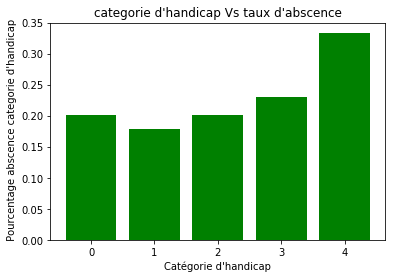

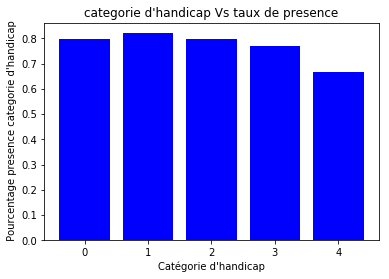

In [12]:
nombre_abscent_par_categorie_handicap=df_abscent.handicap.value_counts()
nombre_abscent_par_categorie_handicap

nombre_present_par_categorie_handicap=df_present.handicap.value_counts()
nombre_present_par_categorie_handicap

nbre_par_categorie_handidcap=df.handicap.value_counts()
nbre_par_categorie_handidcap

Pourcentage_abscence_categorie_handicap=nombre_abscent_par_categorie_handicap/nbre_par_categorie_handidcap
Pourcentage_abscence_categorie_handicap


Pourcentage_presence_categorie_handicap=nombre_present_par_categorie_handicap/nbre_par_categorie_handidcap
Pourcentage_presence_categorie_handicap

x = ['0','1','2','3','4']

y1 = Pourcentage_abscence_categorie_handicap
#plt.bar(x, y1, color='g')
#plt.xlabel("Catégorie d'handicap")
#plt.ylabel(" Pourcentage abscence categorie d'handicap")
#plt.show()


y2 = Pourcentage_presence_categorie_handicap
#plt.bar(x, y2, color='b')
#plt.xlabel("Catégorie d'handicap")
#plt.ylabel(" Pourcentage presence categorie d'handicap")
#plt.show()


def barplot(x,y,color,z,label_x,label_y):
    plt.bar(x, y, color=color)
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.title(z)
    plt.show() 

    

barplot(x, y1,'g',"categorie d'handicap Vs taux d'abscence","Catégorie d'handicap"," Pourcentage abscence categorie d'handicap")
barplot(x, y2,'b',"categorie d'handicap Vs taux de presence","Catégorie d'handicap"," Pourcentage presence categorie d'handicap")

Est ce la présence d'un handicap augmente la chance du présence? Si oui, quel handicap?

On remarque que le taux d'abscence augmente avec l'aggravation de l'handicap ( sauf pour la catégorie 1 qui est legerement inférieur à la catégorie 0).
On constate donc que lorsque le patient est handicapé la probabilité de son abscence lors du rendez-vous augmente.Cette probabilité d'abscence augmente d'avantage avec l'aggravation de l'handicap

## Conclusions

# Limitations
 

Limitation 1: Echantillon representatif
Pour pouvoir valider les conclusions tirées de cette étude il vaudrait mieux vérifier que l'echantillon sur lequel l'étude a été menée est répresentatif des différents profils des patients.

Limitation 2: Je pense qu'il serait interessant de categoriser les rendez vous medicaux selon la spécialité.En effet chaque spécialité peut avoir ses propres facteurs explicatifs des abscences ( pour les medecins qui traite le diabete, il est logiqu de trouver que les diabetiques presentent des taux d'abscence faibles alors que les diabetiques peuvent s'absenter lors d'un rendez-vous avec un médecin qui traite l'hypertension par exemple)

Limitation 3: Une autre information supplémentaire qui peut etre utile est le pays de résidence du patient. Ceci permet d'etudier si la distance à parcourir explique l'eventuel abscence et ça peut etre plus parlant que d'étudier la ville du rendez-vous individuellement.

# Findings

Les facteurs explicatifs one été catégorisé en deux types de facteur : des facteurs relatifs au médecin(rendez-vous) et des facteurs relatifs au patient.
On a constaté que:
- Les patients ont plus tendance à s'absenté pour les rendez-vous de samedi et se présenter le jeudi.

-Plus le délai d'attente augmente, plus le taux d'abscence augmente


- les jeunes s'absentent plus que les plus agés

-Les rendez vous à ILHAS OCEÂNICAS DE TRINDADE ont une forte probabilité d'etre ratés

-Les patients alcoliques ont plus de tendance à se présenter au rendez-vous

-Les patients diabetiques ont plus de tendance à se présenter au rendez-vous


-Les patients qui souffrent de l'hypertension ont plus de tendance à se présenter au rendez-vous


-Les patients qui bénéficie d'une aide financière ont plus de tendance à se présenter au rendez-vous


-La réception d'un sms par le patient augmente la chance qu'il se présente au rendez-vous.Le docteur peut renforcer cette stratégie pour booster le taux de présence.

-Le taux d'abscence augmente avec l'aggravation de l'handicap ( sauf pour la catégorie 1 qui est legerement inférieur à la catégorie 0).
On constate donc que lorsque le patient est handicapé la probabilité de son abscence lors du rendez-vous augmente.Cette probabilité d'abscence augmente d'avantage avec l'aggravation de l'handicap




In [13]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0